<center>
МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ

НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ

«КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ
імені ІГОРЯ СІКОРСЬКОГО»

Навчально-науковий інститут прикладного системного аналізу
Кафедра штучного інтелекту


Звіт

про виконання лабораторної роботи №4

з дисципліни «Інтелектуальний аналіз даних»



Виконали:

студенти III курсу, груп КІ-33 та КІ-31
Тал Майк, Піддубна Марія, Владислав Дмитренко

Прийняв:
Викладач: Андросов Д.В.







Київ – 2025
</center>

# Практикум №4: Побудова та оцінювання якості моделей кластеризацiї з використанням Scikit-Learn Python

## Хiд виконання роботи:

1. Представити початковi данi графiчно.
2. Побудувати модель кластеризацiї згiдно з варiантом.
3. Виконати кластеризацiю даних на основi моделi.
4. Представити розбиття на кластери графiчно, наприклад, рiзними кольорами.
5. Розрахувати час кластеризацiї. Оцiнити швидкодiю методу на надвеликих наборах даних (наприклад, при збiльшеннi кiлькостi точок даних до ста тисяч i бiльше).
6. Побудувати кiлька альтернативних моделей:
- шляхом змiни значень параметрiв основної моделi,
- використати рiзнi функцiї вiдстанi в алгоритмах, де це можна зробити, задати рiзнi значення кiлькостi кластерiв, в алгоритмах де кiлькiсть
кластерiв - параметр.
7. Для кожної альтернативної моделi розрахувати метрики якостi кластеризацiї, що реалiзованi в модулi sklearn.metrics (тiльки метрики згiдно з варiантом):
- Estimated Number of Clusters.
- Adjusted Rand Index.
- Adjusted Mutual Information.
- Homogeneity.
- Completeness.
- V-measure.
- Silhouette Coefficient.
- Calinski-Harabasz Index.
- Davies-Bouldin index.
- Contingency Matrix.
8. Виконати аналiз результатiв кластеризацiї одним з неформальних методiв (тiльки методом згiдно з варiантом):
- чи є розбиття стабiльним на пiдвибiрках даних,
- чи є розбиття стабiльним пiсля видалення окремих об’єктiв,
- чи є розбиття стабiльним пiсля змiни порядку об’єктiв у множинi об’єктiв,
- чи iснує взаємозв’язок мiж результатами кластеризацiї i змiнними, якi не враховувалися при кластеризацiї,
- чи можна iнтерпретувати результати кластеризацiї.
9. Вищенаведенi пункти виконати для заданих двох наборiв даних рiзної форми.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних та про швидкодiю методу.
11. Оцiнити результати кластеризацiї на основi метрик якостi та на основi неформальних методiв. У кожному варiантi задано два набори даних. Спробувати пiдiбрати найкращу модель кластеризацiї для кожного набору даних.

## Умова завдання:

14. Агломеративний алгоритм AgglomerativeClustering. Дослiдити методи розрахунку вiдстанi мiж кластерами: ward, single, average, complete.
    Метрики якостi: Estimated number of clusters, Adjusted Rand Index, V-measure. Побудувати матрицi вiдстаней мiж кластерами, використовую-чи metrics.pairwise_distances.
    Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

    **Початковi данi:**

    (а) sklearn.datasets.make_moons

    (б) from sklearn.datasets.samples_generator import make_blobs

    X1, y_true = make_blobs (n_samples=10000, centers=4, cluster_std=0.60, random_state=0)

    rng = np.random.RandomState(13)

    X = np.dot(X1, rng.randn(2, 2))

---

## Імпорт бібліотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs

from sklearn.cluster import AgglomerativeClustering

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

## Завантаження даних

In [4]:
# Датасет (а) - make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Датасет (б) - make_blobs (трансформований)
np.random.seed(0)
X1, y_true = make_blobs(n_samples=10000, centers=4,
                        cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X_blobs = np.dot(X1, rng.randn(2, 2))

print("Датасети завантажені:")
print(f"  make_moons: {X_moons.shape[0]} об'єктів, {X_moons.shape[1]} ознаки, {len(np.unique(y_moons))} класи")
print(f"  make_blobs: {X_blobs.shape[0]} об'єктів, {X_blobs.shape[1]} ознаки, {len(np.unique(y_true))} класів")

Датасети завантажені:
  make_moons: 1000 об'єктів, 2 ознаки, 2 класи
  make_blobs: 10000 об'єктів, 2 ознаки, 4 класів


За умовою використовуємо два синтетичні датасети: make_moons, що генерує дані у формі двох півмісяців, та make_blobs, що створює чотири кластери, які потім трансформуються матричним множенням для отримання еліптичної форми замість круглої.

Для першого датасета було задано стандартні параметри для створення 1000 точок з невеликим шумом, для другого датасета було задано параметри згідно з умовою варіанту 14.

## Завдання 1: Візуалізація початкових даних

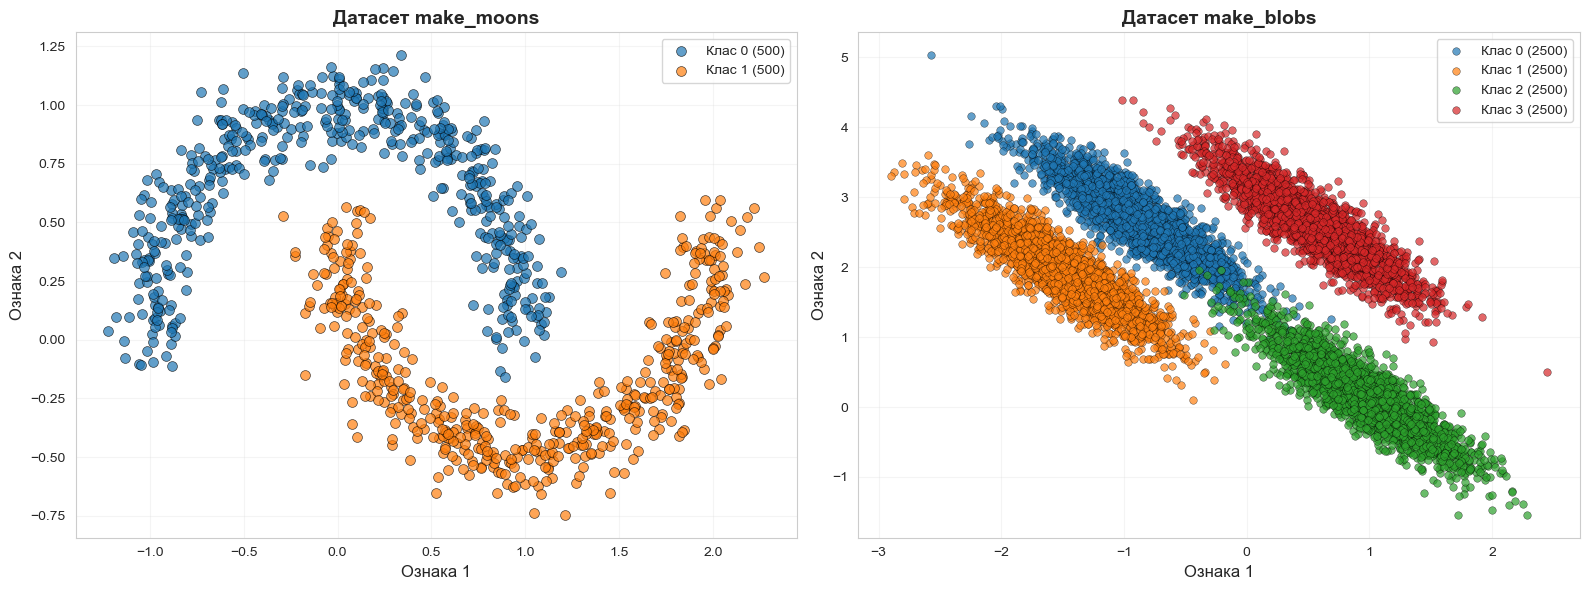

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Датасет make_moons
for label in np.unique(y_moons):
    mask = y_moons == label
    count = np.sum(mask)
    axes[0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                   label=f'Клас {label} ({count})',
                   alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0].set_title('Датасет make_moons', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Ознака 1', fontsize=12)
axes[0].set_ylabel('Ознака 2', fontsize=12)
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# Датасет make_blobs
for label in np.unique(y_true):
    mask = y_true == label
    count = np.sum(mask)
    axes[1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                   label=f'Клас {label} ({count})',
                   alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1].set_title('Датасет make_blobs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Ознака 1', fontsize=12)
axes[1].set_ylabel('Ознака 2', fontsize=12)
axes[1].grid(True, alpha=0.2)
axes[1].legend()

plt.tight_layout()
plt.show()

На графіках зображено структуру обох датасетів зі справжніми мітками класів. Датасет make_moons складається з двох класів у формі півмісяців, які огортають один одного. Датасет make_blobs показує чотири еліптичні кластери після трансформації, які частково перекриваються особливо в центральній області.

Ці мітки класів будуть використані далі для обчислення метрик якості кластеризації (Adjusted Rand Index та V-measure), але важливо зазначити, що сам алгоритм AgglomerativeClustering під час роботи ці кольори не бачить і повинен сам знайти структуру даних лише за координатами точок.

## Завдання 2: Побудова моделей кластеризації

In [6]:
# Методи обчислення відстані між кластерами
linkage_methods = ['ward', 'single', 'average', 'complete']

# Побудова моделей для датасету make_moons
models_moons = {
    method: AgglomerativeClustering(n_clusters=2, linkage=method)
    for method in linkage_methods
}

# Побудова моделей для датасету make_blobs
models_blobs = {
    method: AgglomerativeClustering(n_clusters=4, linkage=method)
    for method in linkage_methods
}

Створено вісім моделей агломеративної кластеризації для тестування чотирьох різних методів обчислення відстані між кластерами (ward, single, average та complete).

Кількість кластерів встановлено відповідно до кількості справжніх класів у кожному датасеті.

## Завдання 3: Кластеризацiя даних на основi моделей

In [7]:
# Кластеризація датасету make_moons
labels_moons = {
    method: models_moons[method].fit_predict(X_moons)
    for method in linkage_methods
}

# Кластеризація датасету make_blobs
labels_blobs = {
    method: models_blobs[method].fit_predict(X_blobs)
    for method in linkage_methods
}

Виконана кластеризація даних методом fit_predict, який навчає модель і одразу повертає мітки кластерів для кожної точки.

Як і було зазначено раніше, під час кластеризації не використовувались справжні мітки класів y_moons та y_true. Алгоритм бачив тільки координати точок X_moons та X_blobs і на їх основі самостійно визначив приналежність кожної точки до кластеру.

## Завдання 4: Візуалізація розбиття на кластери

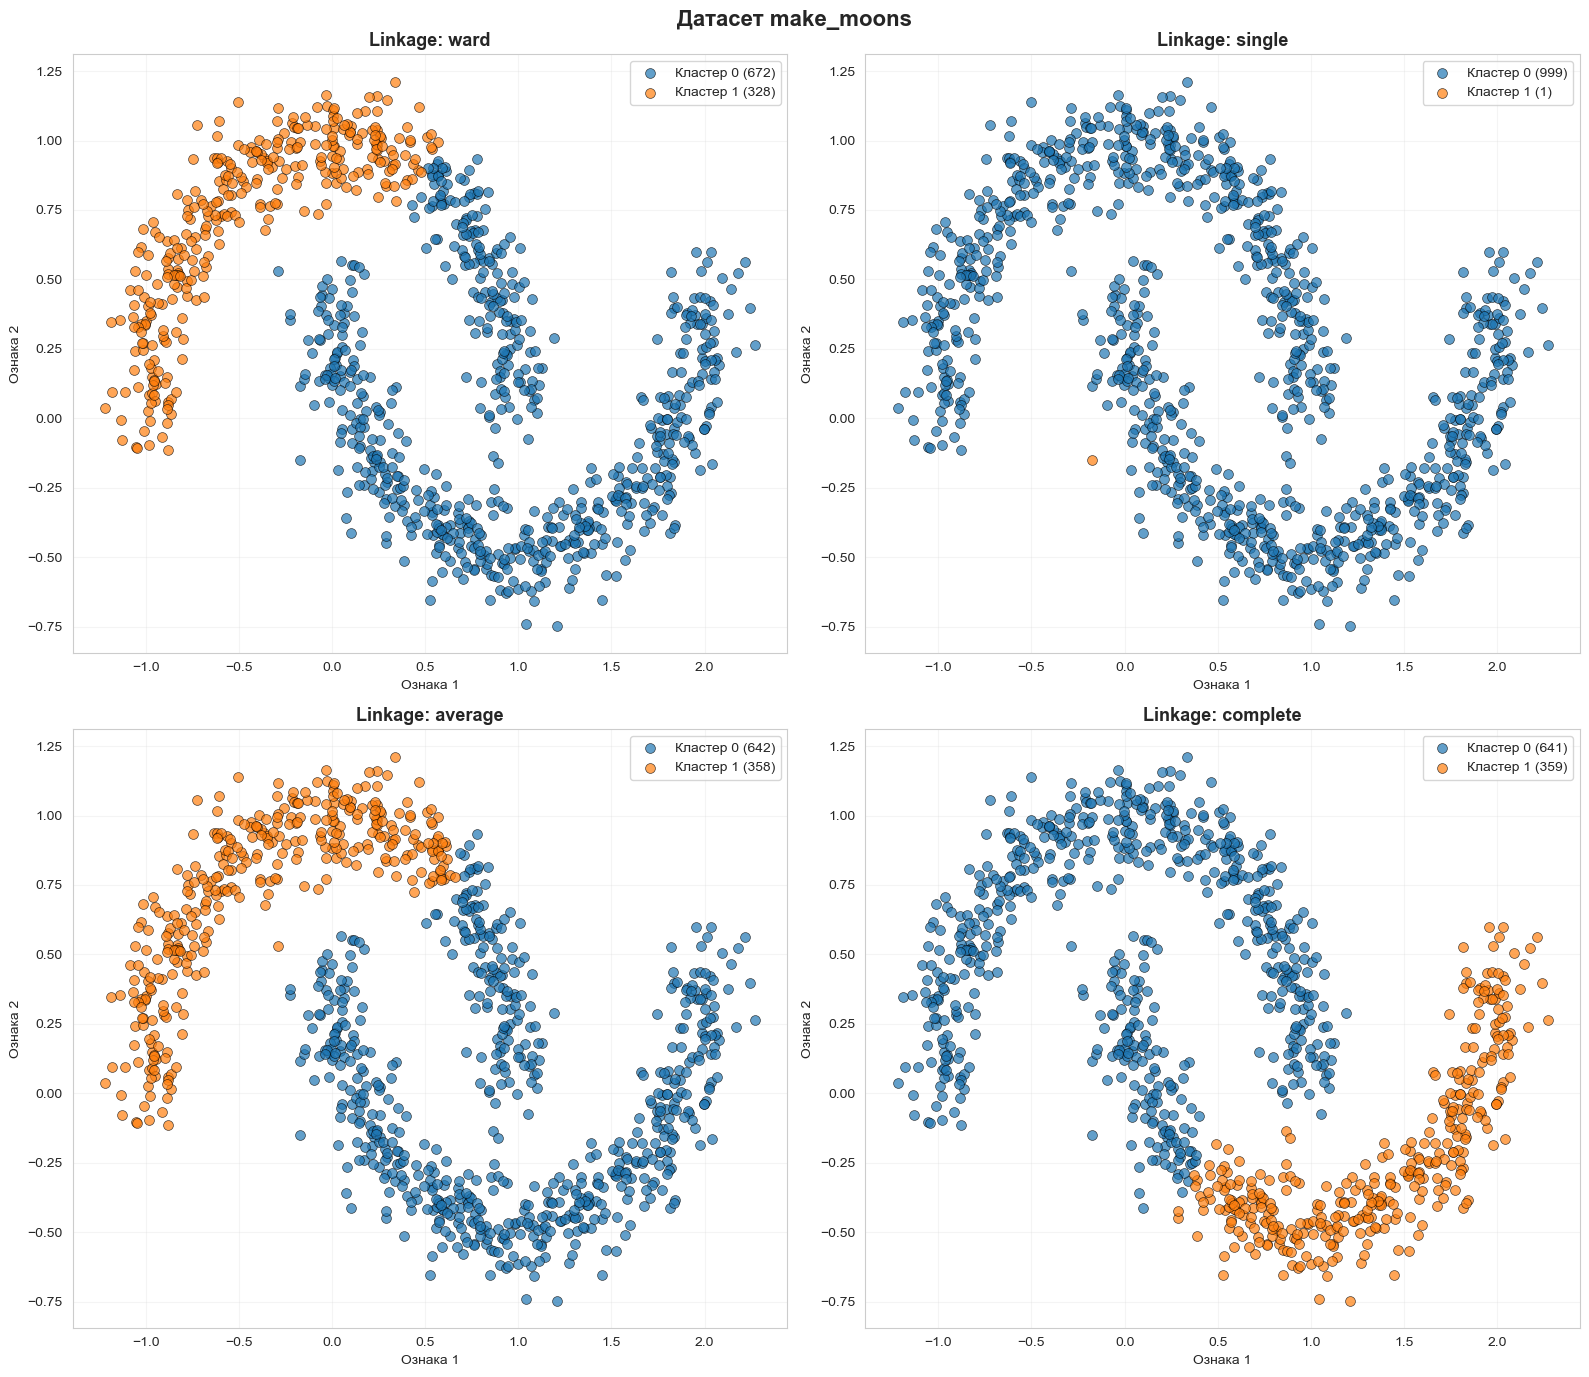

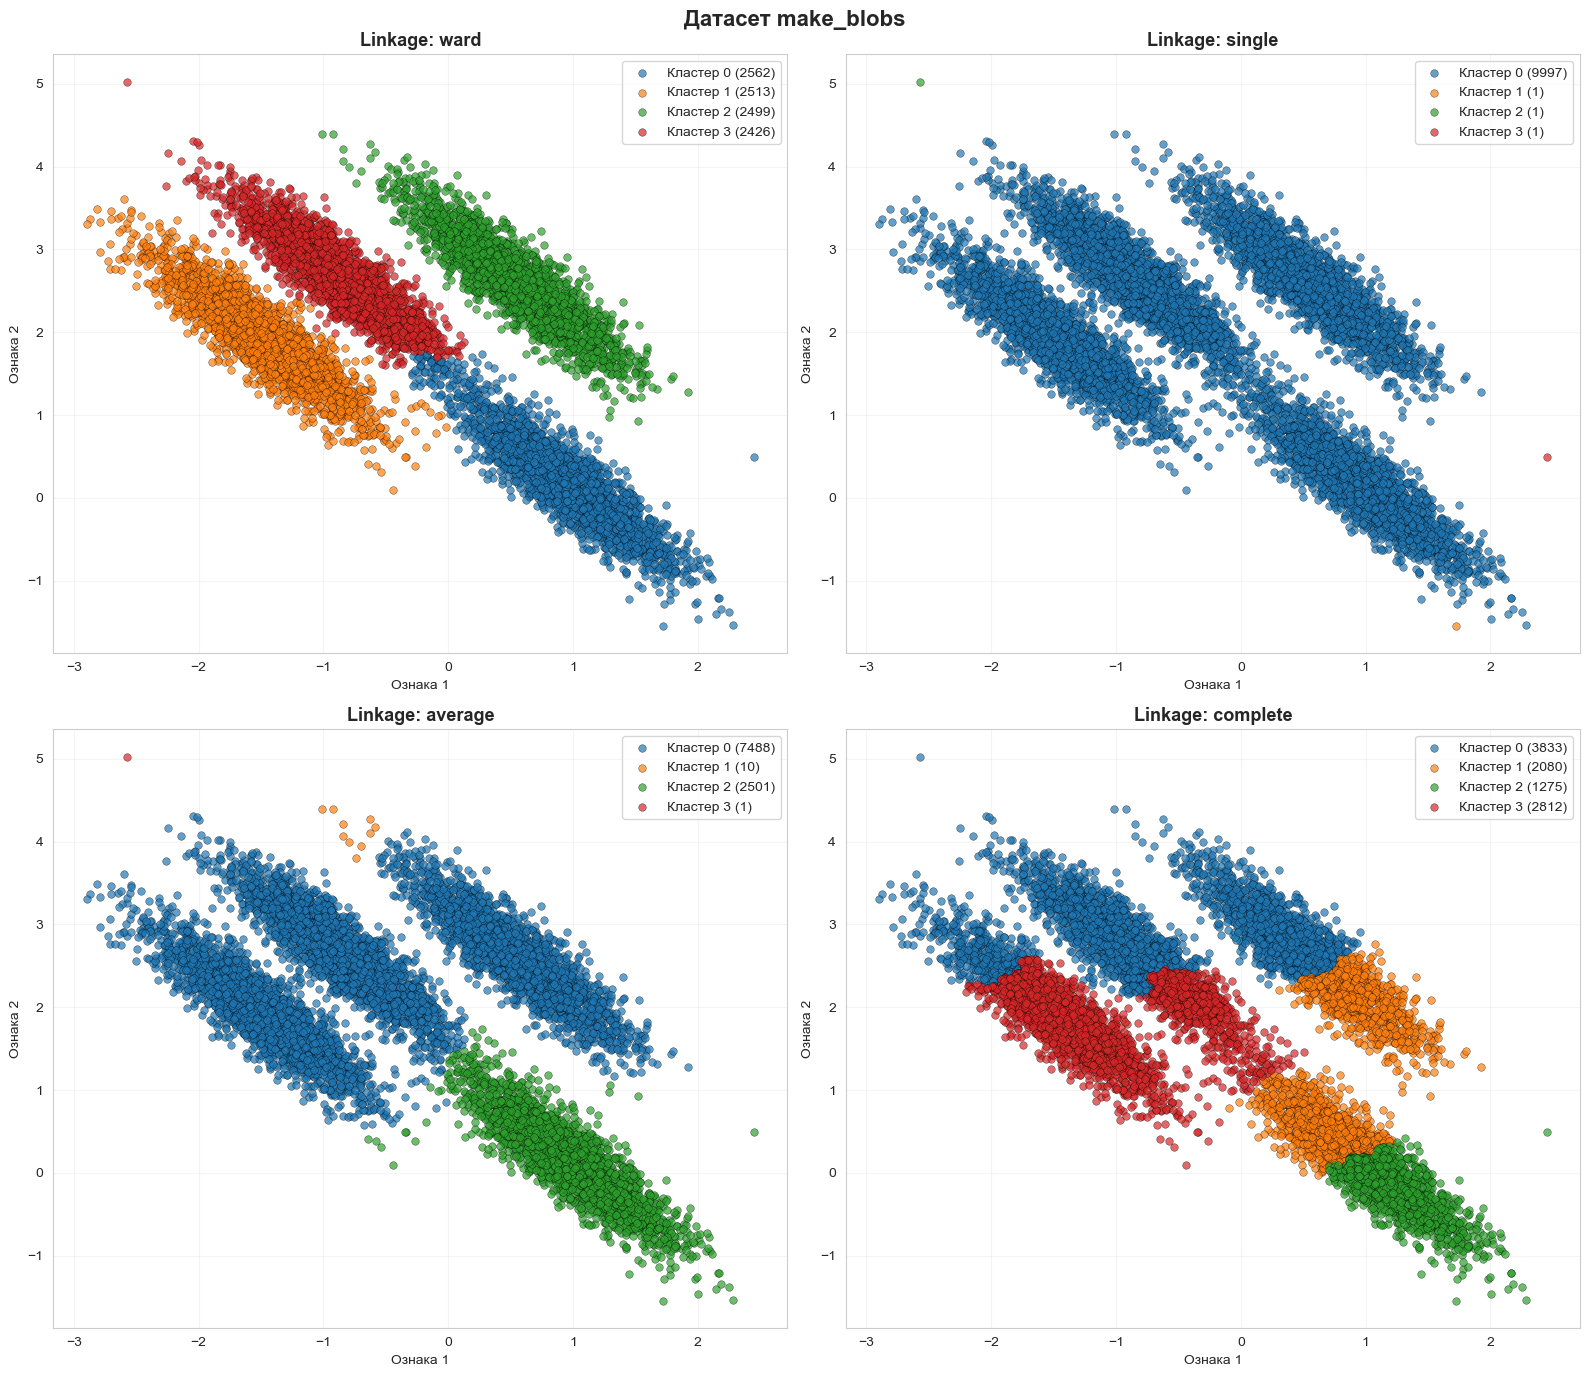

In [8]:
# Датасет make_moons
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Датасет make_moons', fontsize=16, fontweight='bold')

# Ward
for label in np.unique(labels_moons['ward']):
    mask = labels_moons['ward'] == label
    count = np.sum(mask)
    axes[0, 0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0, 0].set_title('Linkage: ward', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Ознака 1')
axes[0, 0].set_ylabel('Ознака 2')
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

# Single
for label in np.unique(labels_moons['single']):
    mask = labels_moons['single'] == label
    count = np.sum(mask)
    axes[0, 1].scatter(X_moons[mask, 0], X_moons[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[0, 1].set_title('Linkage: single', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Ознака 1')
axes[0, 1].set_ylabel('Ознака 2')
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

# Average
for label in np.unique(labels_moons['average']):
    mask = labels_moons['average'] == label
    count = np.sum(mask)
    axes[1, 0].scatter(X_moons[mask, 0], X_moons[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[1, 0].set_title('Linkage: average', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Ознака 1')
axes[1, 0].set_ylabel('Ознака 2')
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

# Complete
for label in np.unique(labels_moons['complete']):
    mask = labels_moons['complete'] == label
    count = np.sum(mask)
    axes[1, 1].scatter(X_moons[mask, 0], X_moons[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=50, edgecolors='k', linewidth=0.5)
axes[1, 1].set_title('Linkage: complete', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Ознака 1')
axes[1, 1].set_ylabel('Ознака 2')
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Датасет make_blobs
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Датасет make_blobs', fontsize=16, fontweight='bold')

# Ward
for label in np.unique(labels_blobs['ward']):
    mask = labels_blobs['ward'] == label
    count = np.sum(mask)
    axes[0, 0].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[0, 0].set_title('Linkage: ward', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Ознака 1')
axes[0, 0].set_ylabel('Ознака 2')
axes[0, 0].grid(True, alpha=0.2)
axes[0, 0].legend()

# Single
for label in np.unique(labels_blobs['single']):
    mask = labels_blobs['single'] == label
    count = np.sum(mask)
    axes[0, 1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[0, 1].set_title('Linkage: single', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Ознака 1')
axes[0, 1].set_ylabel('Ознака 2')
axes[0, 1].grid(True, alpha=0.2)
axes[0, 1].legend()

# Average
for label in np.unique(labels_blobs['average']):
    mask = labels_blobs['average'] == label
    count = np.sum(mask)
    axes[1, 0].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1, 0].set_title('Linkage: average', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Ознака 1')
axes[1, 0].set_ylabel('Ознака 2')
axes[1, 0].grid(True, alpha=0.2)
axes[1, 0].legend()

# Complete
for label in np.unique(labels_blobs['complete']):
    mask = labels_blobs['complete'] == label
    count = np.sum(mask)
    axes[1, 1].scatter(X_blobs[mask, 0], X_blobs[mask, 1],
                        label=f'Кластер {label} ({count})',
                        alpha=0.7, s=30, edgecolors='k', linewidth=0.3)
axes[1, 1].set_title('Linkage: complete', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Ознака 1')
axes[1, 1].set_ylabel('Ознака 2')
axes[1, 1].grid(True, alpha=0.2)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### Висновки

**Датасет make_moons:**
- **Ward (672/328):** Розділив дані вертикально замість поділу за формою півмісяців. Метод ward мінімізує внутрішньокластерну дисперсію, тому намагається створити компактні сферичні кластери, що призводить до неправильного розбиття криволінійних структур.
- **Single (999/1):** Алгоритм послідовно об'єднував кластери на основі найближчих точок (ефект ланцюга), що призвело до злиття обох півмісяців в один великий кластер, залишивши одну ізольовану точку-викид.
- **Average (642/358):** Найкращий результат для цього датасету. Використання середньої відстані між усіма парами точок дозволило частково розпізнати криволінійну структуру і створити більш адекватний розподіл, хоча й не ідеально збалансований.
- **Complete (641/359):** Результат дуже близький до average. Використання максимальної відстані між найвіддаленішими точками допомогло уникнути ефекту ланцюга і створити компактніші кластери, що краще відповідає структурі даних порівняно з ward.

Отже, методи average та complete продемонстрували найкращу здатність розпізнавати криволінійні структури завдяки використанню агрегованих відстаней між точками, тоді як ward та single виявились неефективними - ward через орієнтацію на сферичні кластери, а single через критичну схильність до ефекту ланцюга.

**Датасет make_blobs:**
- **Ward (2562/2513/2499/2426):** Найкращий результат з майже ідеальним рівномірним розподілом. Мінімізація дисперсії всередині кластерів дозволила ward точно розпізнати структуру даних навіть після лінійної трансформації, яка перетворила круглі кластери на еліптичні.
- **Single (9997/1/1/1):** Аналогічно, спрацював ефект ланцюга, що призвело до злиття обох півмісяців в один великий кластер, залишивши три ізольовані точки-викиди.
- **Average (7488/10/2501/1):** Сильно незбалансована кластеризація показує що метод частково піддався ефекту ланцюга. Один кластер правильно виділений, але три інші або злились в один великий, або залишились майже порожніми через складність визначення середньої відстані в зоні перекриття.
- **Complete (3833/2080/1275/2812):** Усі чотири кластери коректно ідентифіковані, але з нерівномірними розмірами через використання максимальної відстані між точками. Метод створив більш компактні кластери ніж необхідно, що призвело до неправильного розподілу точок у зонах перекриття.

Отже, метод ward показав найкращу ефективність для даних з компактною еліптичною структурою, тоді як complete забезпечив прийнятний але менш точний результат. Single та average виявились повністю непридатними для цього типу даних через ефект ланцюга та неспроможність коректно обробляти зони перекриття кластерів.

---

## Завдання 5: Розрахунок часу кластеризації та оцінка швидкодії

In [9]:
import time
import pandas as pd

test_sizes = [25000, 50000, 100000]

timing_results = {
    'n_samples': [],
    'linkage': [],
    'time_seconds': []
}

print("Тестування швидкодії на датасеті make_moons:\n")

for n in test_sizes:
    print(f"Розмір датасету: {n} точок")

    X_test, _ = make_moons(n_samples=n, noise=0.1, random_state=42)

    # Для 100,000 точок тестуємо тільки single
    methods_to_test = ['single'] if n == 100000 else linkage_methods

    for method in methods_to_test:
        model = AgglomerativeClustering(n_clusters=2, linkage=method)

        start_time = time.time()
        model.fit(X_test)
        elapsed = time.time() - start_time

        timing_results['n_samples'].append(n)
        timing_results['linkage'].append(method)
        timing_results['time_seconds'].append(elapsed)

        print(f"  {method:12s}: {elapsed:.4f} сек")

    if n == 100000:
        print("  (Інші методи пропущені через надто довгий час виконання)")
    print()

timing_df = pd.DataFrame(timing_results)
print("\nЗагальна таблиця результатів:")
print(timing_df.to_string(index=False))

Тестування швидкодії на датасеті make_moons:

Розмір датасету: 25000 точок
  ward        : 6.7084 сек
  single      : 1.0224 сек
  average     : 6.1769 сек
  complete    : 5.7659 сек

Розмір датасету: 50000 точок
  ward        : 143.3330 сек
  single      : 4.6634 сек
  average     : 150.3143 сек
  complete    : 129.7647 сек

Розмір датасету: 100000 точок
  single      : 21.2822 сек
  (Інші методи пропущені через надто довгий час виконання)


Загальна таблиця результатів:
 n_samples  linkage  time_seconds
     25000     ward      6.708383
     25000   single      1.022359
     25000  average      6.176936
     25000 complete      5.765918
     50000     ward    143.333010
     50000   single      4.663366
     50000  average    150.314339
     50000 complete    129.764708
    100000   single     21.282186


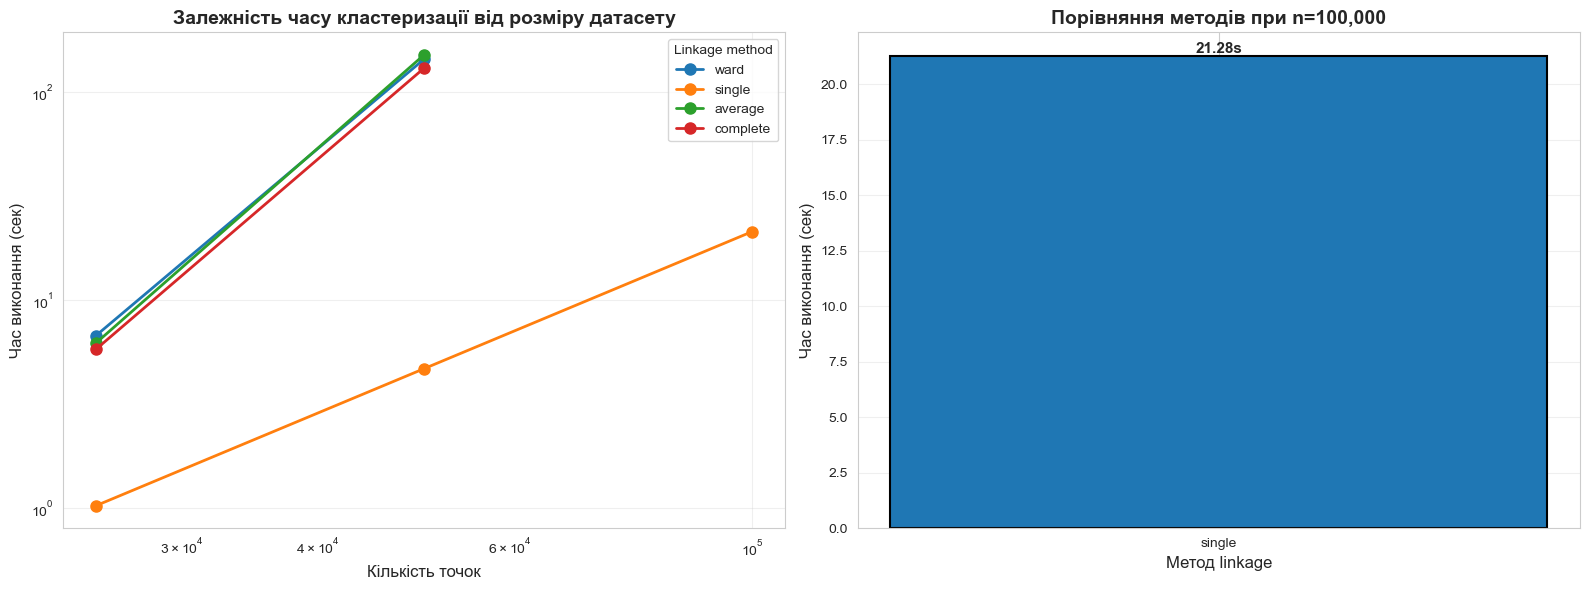

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for method in linkage_methods:
    method_data = timing_df[timing_df['linkage'] == method]
    ax1.plot(method_data['n_samples'], method_data['time_seconds'], 
             marker='o', linewidth=2, markersize=8, label=method)

ax1.set_xlabel('Кількість точок', fontsize=12)
ax1.set_ylabel('Час виконання (сек)', fontsize=12)
ax1.set_title('Залежність часу кластеризації від розміру датасету', 
              fontsize=14, fontweight='bold')
ax1.legend(title='Linkage method', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
ax1.set_yscale('log')

max_size_data = timing_df[timing_df['n_samples'] == test_sizes[-1]]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax2.bar(max_size_data['linkage'], max_size_data['time_seconds'], 
               color=colors, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Метод linkage', fontsize=12)
ax2.set_ylabel('Час виконання (сек)', fontsize=12)
ax2.set_title(f'Порівняння методів при n={test_sizes[-1]:,}', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}s', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

Для датасетів до 25,000 точок можна використовувати будь-який із методів залежно від структури даних - всі методи виконуються за прийнятний час (до 7 секунд). Для датасетів 25,000-50,000 точок метод single є оптимальним вибором за швидкодією, проте якщо якість кластеризації критична і час не є обмеженням, можна розглянути інші методи залежно від форми кластерів. Для надвеликих датасетів (понад 50,000 точок) агломеративна кластеризація з методами ward, average та complete стає непрактичною, тому єдиним реалістичним варіантом серед агломеративних методів залишається single, або слід розглянути альтернативні алгоритми кластеризації (DBSCAN, MiniBatchKMeans, HDBSCAN), які мають кращу масштабованість для надвеликих обсягів даних.

---

## Завдання 6: Побудова альтернативних моделей

In [11]:
n_clusters_variants = [2, 3, 4]

alternative_models = {}

for n_clust in n_clusters_variants:
    for method in linkage_methods:
        key = f"n{n_clust}_{method}"
        alternative_models[key] = {
            'model_moons': AgglomerativeClustering(n_clusters=n_clust, linkage=method),
            'model_blobs': AgglomerativeClustering(n_clusters=n_clust, linkage=method),
            'n_clusters': n_clust,
            'linkage': method
        }

print(f"Створено {len(alternative_models)} альтернативних моделей")
print(f"Варіанти кількості кластерів: {n_clusters_variants}")
print(f"Методи linkage: {linkage_methods}")

Створено 12 альтернативних моделей
Варіанти кількості кластерів: [2, 3, 4]
Методи linkage: ['ward', 'single', 'average', 'complete']


In [12]:
for key, model_dict in alternative_models.items():
    model_dict['labels_moons'] = model_dict['model_moons'].fit_predict(X_moons)
    model_dict['labels_blobs'] = model_dict['model_blobs'].fit_predict(X_blobs)

print("Кластеризація виконана для всіх альтернативних моделей")

Кластеризація виконана для всіх альтернативних моделей


---

## Завдання 7: Розрахунок метрик якості кластеризації

In [15]:
from sklearn.metrics import (
    adjusted_rand_score,
    v_measure_score,
    pairwise_distances
)

# Розрахунок метрик для всіх альтернативних моделей
metrics_results = []

for key, model_dict in alternative_models.items():
    n_clust = model_dict['n_clusters']
    method = model_dict['linkage']
    labels_moons_pred = model_dict['labels_moons']
    labels_blobs_pred = model_dict['labels_blobs']

    # Визначаємо кількість знайдених кластерів (Estimated Number of Clusters)
    n_clusters_moons = len(np.unique(labels_moons_pred))
    n_clusters_blobs = len(np.unique(labels_blobs_pred))

    # Adjusted Rand Index
    ari_moons = adjusted_rand_score(y_moons, labels_moons_pred)
    ari_blobs = adjusted_rand_score(y_true, labels_blobs_pred)

    # V-measure
    v_measure_moons = v_measure_score(y_moons, labels_moons_pred)
    v_measure_blobs = v_measure_score(y_true, labels_blobs_pred)

    metrics_results.append({
        'model': key,
        'n_clusters': n_clust,
        'linkage': method,
        'dataset': 'make_moons',
        'estimated_clusters': n_clusters_moons,
        'ari': ari_moons,
        'v_measure': v_measure_moons
    })

    metrics_results.append({
        'model': key,
        'n_clusters': n_clust,
        'linkage': method,
        'dataset': 'make_blobs',
        'estimated_clusters': n_clusters_blobs,
        'ari': ari_blobs,
        'v_measure': v_measure_blobs
    })

metrics_df = pd.DataFrame(metrics_results)

# Виведення результатів
print("=" * 90)
print("МЕТРИКИ ЯКОСТІ КЛАСТЕРИЗАЦІЇ")
print("=" * 90)

for dataset_name in ['make_moons', 'make_blobs']:
    print(f"\nДатасет: {dataset_name}")
    print("-" * 90)

    dataset_metrics = metrics_df[metrics_df['dataset'] == dataset_name].copy()
    dataset_metrics = dataset_metrics.sort_values(['n_clusters', 'linkage'])

    display_df = dataset_metrics[['n_clusters', 'linkage', 'estimated_clusters',
                                    'ari', 'v_measure']].copy()

    display_df.columns = ['Задано n', 'Linkage', 'Знайдено n', 'ARI', 'V-measure']

    print(display_df.to_string(index=False))
    print()

print("=" * 90)
print("МАТРИЦІ ВІДСТАНЕЙ МІЖ КЛАСТЕРАМИ (Pairwise Distances)")
print("=" * 90)

# Виберемо основні моделі (n_clusters=2 для moons, n_clusters=4 для blobs)
main_models = {
    'make_moons': {k: v for k, v in alternative_models.items() if v['n_clusters'] == 2},
    'make_blobs': {k: v for k, v in alternative_models.items() if v['n_clusters'] == 4}
}

for dataset_name, dataset in [('make_moons', X_moons), ('make_blobs', X_blobs)]:
    print(f"\n{'='*90}")
    print(f"Датасет: {dataset_name}")
    print(f"{'='*90}\n")

    for key, model_dict in main_models[dataset_name].items():
        method = model_dict['linkage']
        labels = model_dict[f'labels_{dataset_name.split("_")[1]}']
        n_clust = len(np.unique(labels))

        # Обчислюємо центроїди кластерів
        centroids = []
        for cluster_id in np.unique(labels):
            cluster_points = dataset[labels == cluster_id]
            centroid = cluster_points.mean(axis=0)
            centroids.append(centroid)

        centroids = np.array(centroids)

        # Обчислюємо матрицю відстаней між центроїдами
        dist_matrix = pairwise_distances(centroids, metric='euclidean')

        print(f"Linkage: {method}")
        print(f"Матриця відстаней між центроїдами кластерів ({n_clust}x{n_clust}):")
        print(dist_matrix)
        print()

МЕТРИКИ ЯКОСТІ КЛАСТЕРИЗАЦІЇ

Датасет: make_moons
------------------------------------------------------------------------------------------
 Задано n  Linkage  Знайдено n      ARI  V-measure
        2  average           2 0.506490   0.514015
        2 complete           2 0.503643   0.506002
        2   single           2 0.000000   0.001979
        2     ward           2 0.429833   0.469005
        3  average           3 0.380118   0.461607
        3 complete           3 0.378511   0.460944
        3   single           3 0.000004   0.003916
        3     ward           3 0.321945   0.432698
        4  average           4 0.267083   0.407829
        4 complete           4 0.255485   0.405790
        4   single           4 0.000012   0.005814
        4     ward           4 0.344431   0.467653


Датасет: make_blobs
------------------------------------------------------------------------------------------
 Задано n  Linkage  Знайдено n           ARI  V-measure
        2  average         

### Висновки

Проаналізувавши метрики якості кластеризації для різних методів linkage, можна побачити, що ефективність методів сильно залежить від структури даних.

**Датасет make_moons:**

Для правильної кількості кластерів (n=2) найкращі результати дали методи average (ARI=0.507, V-measure=0.514) та complete (ARI=0.504, V-measure=0.506). Вони змогли більш-менш правильно розділити 
два півмісяці. Метод ward спрацював гірше (ARI=0.430, V-measure=0.469), бо він шукає круглі кластери, а півмісяці мають вигнуту форму. Метод single взагалі не справився (ARI≈0, V-measure≈0.002) - 
він об'єднав майже всі точки в один кластер через ефект ланцюга. Це видно і з матриці відстаней: single дає найменшу відстань між центроїдами (0.78), тоді як інші методи дають 1.51-1.54.

Коли збільшуємо кількість кластерів до 3-4, результати погіршуються, що логічно, адже насправді там тільки 2 класи. Хоча ward при n=4 показує ARI=0.344, що може означати, що він знайшов якісь 
підгрупи всередині півмісяців.

**Датасет make_blobs:**

Для правильної кількості кластерів (n=4) метод ward показав майже ідеальний результат (ARI=0.975, V-measure=0.965) - він практично повністю правильно розділив всі 4 кластери. Це тому, що ward
добре працює з компактними круглими/еліптичними кластерами. Методи complete (ARI=0.367, V-measure=0.498) та average (ARI=0.321, V-measure=0.534) спрацювали значно гірше, особливо там де кластери
перекриваються. Single знову провалився (ARI≈0, V-measure≈0.0006) через той самий ефект ланцюга.

При n=3 ward все ще непогано працює (ARI=0.700, V-measure=0.824), намагаючись з'єднати два найближчі кластери з чотирьох. При n=2 всі методи дають погані результати, бо справжня структура має 4
кластери, а не 2.

**Матриці відстаней:**

Матриці відстаней між центроїдами підтверджують наші спостереження. Для make_moons метод single дає дуже малу відстань (0.78), через що кластери зливаються. Для make_blobs метод ward створює
більш-менш рівномірно розташовані кластери з відстанями 0.97-3.09, а average та complete дають дуже різні відстані (від 0 до 7.85), що показує нерівномірний розподіл.

**Узагальнення:**

Для даних з вигнутою формою (як make_moons) краще використовувати average або complete. Для звичайних компактних кластерів (як make_blobs) однозначно ward. Важливо правильно вибрати кількість кластерів - бо, результат буде поганий навіть з хорошим методом.

---